In [1]:
#https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams.update({'font.size': 20})
mpl.rcParams.update({'figure.facecolor': 'white'})

### 1-D interpolation

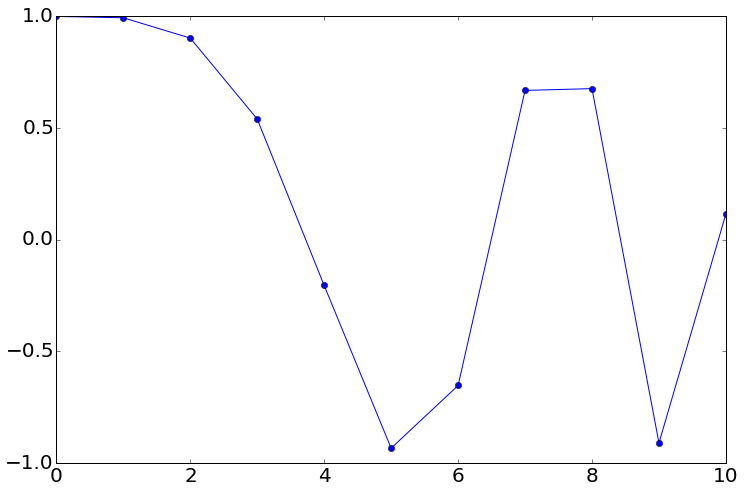

In [2]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
plt.plot(x,y, 'o-')

In [3]:
# this creates a function-like "call method"
f = interp1d(x, y)
f2 = interp1d(x,y, kind = 'cubic')

# kind : str or int, optional
#  |      Specifies the kind of interpolation as a string
#  |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic, 'cubic'
#  |      where 'slinear', 'quadratic' and 'cubic' refer to a spline
#  |      interpolation of first, second or third order) or as an integer
#  |      specifying the order of the spline interpolator to use.
#  |      Default is 'linear'

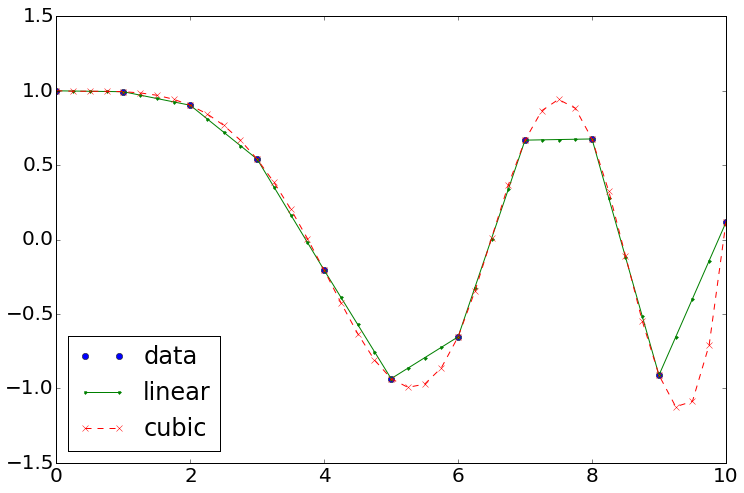

In [4]:
# create a new basis vector and interpolate to it
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '.-', xnew, f2(xnew), '--x')
plt.legend(['data', 'linear', 'cubic'], loc='best')

### Multivariate data interpolation: unstructured data

Note this only works 1-D inputs, i.e. z is 1-D array

In [5]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [6]:
# want 2D data on this grid
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [7]:
grid_x.shape

(100, 200)

In [8]:
# but we only have data on this grid (note that values is a 1-D array)
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [9]:
print values.shape, points.shape

(1000,) (1000, 2)


In [10]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [11]:
# note this also works:
grid_z0T = griddata((points[:,0], points[:,1]), values, (grid_x, grid_y), method='nearest')

<matplotlib.colorbar.Colorbar instance at 0x2b2100d99c20>

/glade/apps/opt/matplotlib/1.4.3/gnu-westmere/4.8.2/lib/python2.7/site-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


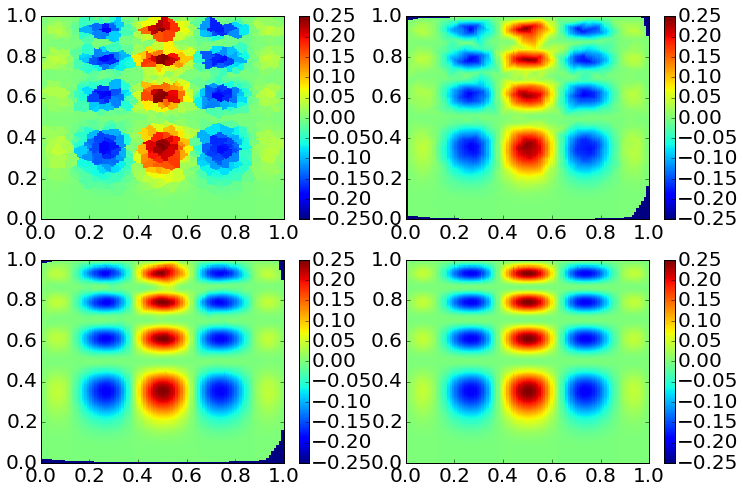

In [12]:
plt.subplot(221)
plt.pcolormesh(grid_x,grid_y,grid_z0, vmax = 0.25, vmin = -0.25)
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(grid_x,grid_y,grid_z1, vmax = 0.25, vmin = -0.25)
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(grid_x,grid_y,grid_z2, vmax = 0.25, vmin = -0.25)
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(grid_x,grid_y,func(grid_x,grid_y), vmax = 0.25, vmin = -0.25)
plt.colorbar()

# note nans at edges for linear and cubic methods

In [49]:
griddata?
# also works for 1D

### 2-D interpolation with arrays

let's take the gridded example from the last exercise and interpolate to a point not on the grid_x,grid_y grid

In [ ]:
# this works in a similar way to interp1d, as it creates a function
f = interp2d(grid_x, grid_y, func(grid_x,grid_y), kind = 'cubic')

In [ ]:
f(0.41, 0.81)

very slow (had to restart kernel), not realistic to do in this case

Try again with passing 1D arrays for grid

In [27]:
f = interp2d(grid_x[:,0], grid_y[0,:], func(grid_x,grid_y), kind = 'cubic')

ValueError: When on a regular grid with x.size = m and y.size = n, if z.ndim == 2, then z must have shape (n, m)

Looks like there is a transposing issue

In [17]:
test = grid_x[:,0]
print test.shape
test2 = grid_y[0,:]
print test2.shape
print func(grid_x,grid_y).shape

(100,)
(200,)
(100, 200)


Try again with y first in the function call

In [13]:
f = interp2d(grid_y[0,:], grid_x[:,0], func(grid_x,grid_y), kind = 'cubic')

In [16]:
f(0.81,0.41)

array([ 0.08804951])

In [15]:
func(0.41,0.81)

0.088049614764835263

Note that the x,y have to be transposed between the two function calls

In [21]:
# make a new grid to interpolate to
# want 2D data on this grid
grid_x2, grid_y2 = np.mgrid[0:2:100j, 0:2:200j]

In [27]:
z_2 = f(grid_y2,grid_x2)
print z_2[0].shape

ValueError: x and y should both be 1-D arrays

Looks like interp2 function will not take arrays as input

In [18]:
plt.pcolormesh(grid_x2,grid_y2,z_2 vmax = 0.25, vmin = -0.25)
plt.colorbar()

ValueError: x and y should both be 1-D arrays

### 2-D interpolation for regularly gridded arrays

This can be done for a gridded array, even if uneven spacing.
Let's try the last example again

In [11]:
from scipy.interpolate import RegularGridInterpolator

In [40]:
RegularGridInterpolator?
#RegularGridInterpolator(self, points, values, method='linear', 
#   bounds_error=True, fill_value=nan)

Note that points need to be 1-D arrays, i.e. vectors

In [24]:
frg = RegularGridInterpolator(points =[grid_x[:,0], grid_y[0,:]], values = func(grid_x,grid_y))

In [26]:
frg([0.41,0.81])

array([ 0.08779936])

In [37]:
func(0.41,0.81)

0.088049614764835263

Only options are linear and nearest, this is as good as it gets

### Spline 2-D interpolation for regularly gridded arrays

In [42]:
from scipy.interpolate import RectBivariateSpline
RBS = RectBivariateSpline

In [43]:
frb = RBS(grid_x[:,0], grid_y[0,:], func(grid_x,grid_y))

In [46]:
# note difference in syntax from above
frb(0.41,0.81)

array([[ 0.08804951]])

This gives an answer much closer to the analytical result

It is akward that these different methods have different ways of calling the created function. Freeware